# **Patient's condition based on review**

**PACKAGES**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import string 
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
# the following command is to show the full data table
pd.set_option('display.max_rows', None)

**importing data set**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP projects/Condition classification based on review/drugsComTest_raw.tsv', sep='\t')

In [ ]:
df.shape

(53766, 7)

In [ ]:
df.head()

Unnamed: 0         drugName                     condition  \
0      163740      Mirtazapine                    Depression   
1      206473       Mesalamine  Crohn's Disease, Maintenance   
2      159672          Bactrim       Urinary Tract Infection   
3       39293         Contrave                   Weight Loss   
4       97768  Cyclafem 1 / 35                 Birth Control   

                                              review  rating  \
0  "I&#039;ve tried a few antidepressants over th...    10.0   
1  "My son has Crohn&#039;s disease and has done ...     8.0   
2                      "Quick reduction of symptoms"     9.0   
3  "Contrave combines drugs that were used for al...     9.0   
4  "I have been on this birth control for one cyc...     9.0   

                 date  usefulCount  
0   February 28, 2012           22  
1        May 17, 2009           17  
2  September 29, 2017            3  
3       March 5, 2017           35  
4    October 22, 2015            4

In [ ]:
df.condition.value_counts()

Birth Control                                                     9648
Depression                                                        3095
Pain                                                              2100
Anxiety                                                           1908
Acne                                                              1847
Bipolar Disorde                                                   1380
Weight Loss                                                       1248
Insomnia                                                          1231
Obesity                                                           1189
ADHD                                                              1126
Emergency Contraception                                            827
Vaginal Yeast Infection                                            811
Diabetes, Type 2                                                   808
High Blood Pressure                                                783
Smokin

In [ ]:
# for simplicity of computations we gonna deal with just 4 conditions
# ['Birth Control', 'Depression', 'High Blood Pressure', 'Diabetes, Type 2']

df_train = df[(df.condition == 'Birth Control') | (df.condition == 'Depression') | (df.condition == 'High Blood Pressure') | (df.condition == 'Diabetes, Type 2')]

In [ ]:
df_train.shape

(14334, 7)

notice that the size of the data has been reduced

**Dropping unnecessary columns**

In [ ]:
x = df_train.drop(['Unnamed: 0','drugName','rating','date','usefulCount'], axis=1)
trial = df_train.drop(['Unnamed: 0','rating','date','usefulCount'], axis=1)

In [ ]:
x.head()

condition                                             review
0      Depression  "I&#039;ve tried a few antidepressants over th...
4   Birth Control  "I have been on this birth control for one cyc...
6   Birth Control  "I&#039;ve had the copper coil for about 3 mon...
9   Birth Control  "I was on this pill for almost two years. It d...
30  Birth Control  "I absolutely love this product and recommend ...

In [ ]:
x.condition.value_counts()

Birth Control          9648
Depression             3095
Diabetes, Type 2        808
High Blood Pressure     783
Name: condition, dtype: int64

# **Word map for each condition**

**word map is a way to get the most frequent word in each condition**

In [ ]:
x_birth = x[(x.condition == 'Birth Control')]
x_dep = x[(x.condition == 'Depression')]
x_diabetes = x[(x.condition == 'Diabetes, Type 2')]
x_pressure = x[(x.condition == 'High Blood Pressure')]

***Birth control word map***

Text(0.5, 1.0, 'Word map of Birth control')

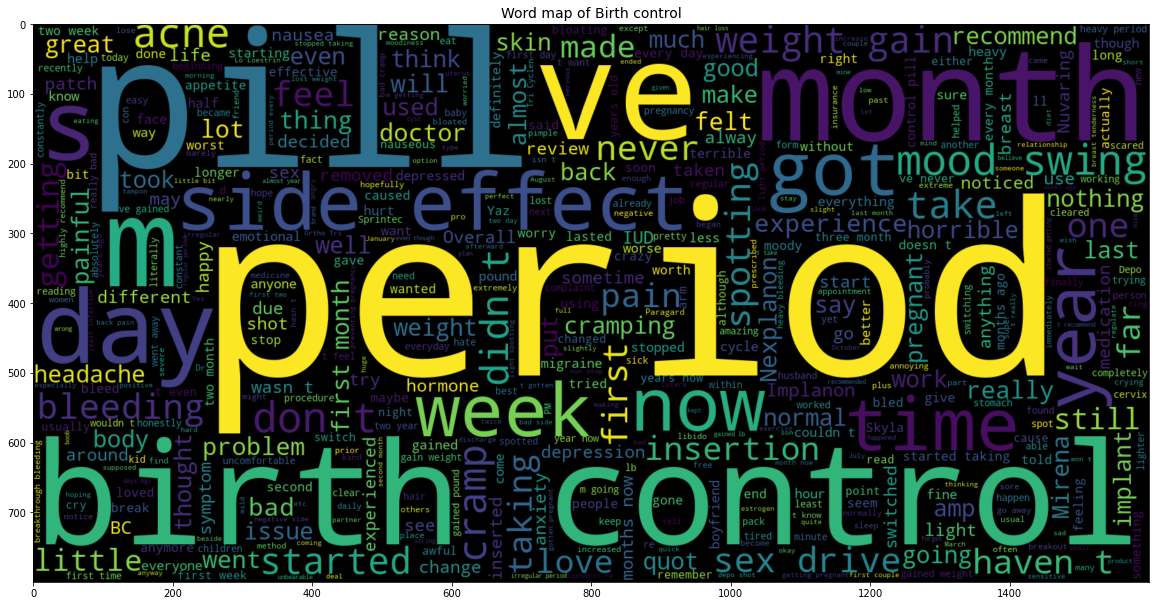

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20, 20))
word_cloud = WordCloud(max_words=500, width = 1600, height = 800).generate(" ".join(x_birth.review))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('Word map of Birth control', fontsize=14)

Text(0.5, 1.0, 'Word Cloud of depression')

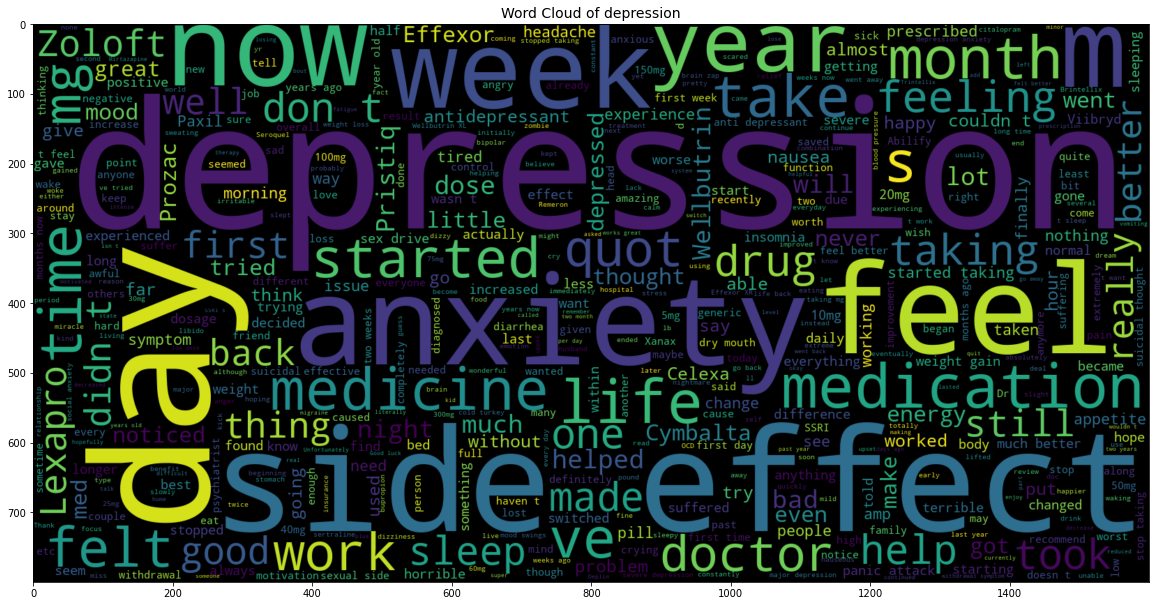

In [ ]:
plt.figure(figsize=(20,20))
word_cloud = WordCloud(max_words= 500, width = 1600, height= 800).generate(" ".join(x_dep.review))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('Word Cloud of depression', fontsize = 14)

Text(0.5, 1.0, 'Word Cloud of diabetes')

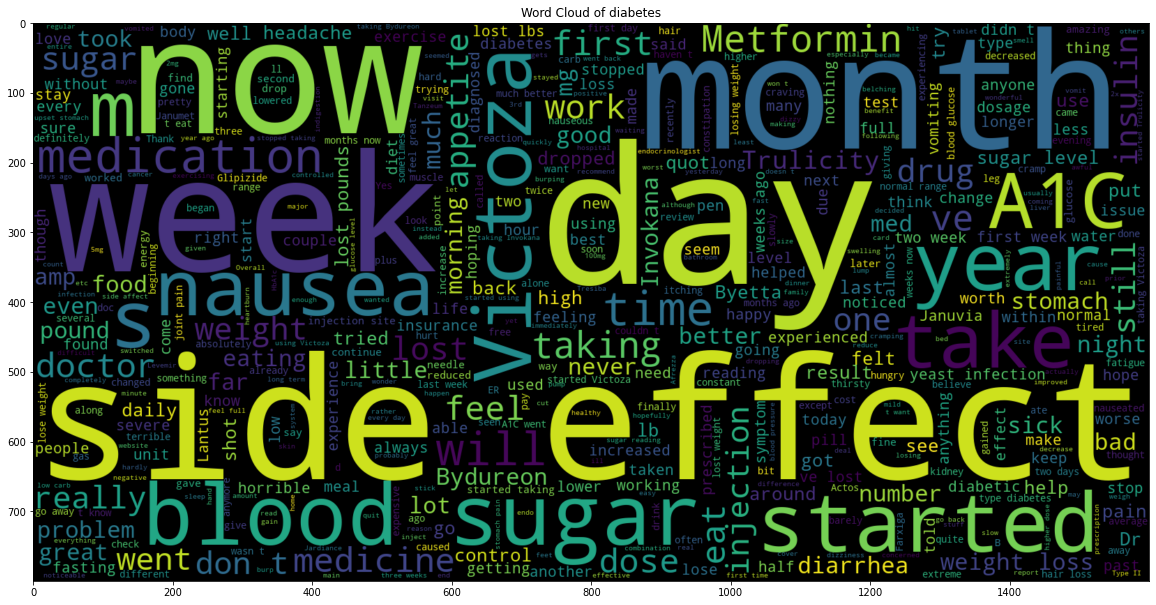

In [ ]:
plt.figure(figsize=(20,20))
word_cloud = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(x_diabetes.review))
plt.imshow(word_cloud , interpolation='bilinear')
plt.title('Word Cloud of diabetes')

Text(0.5, 1.0, 'Word Cloud of pressure')

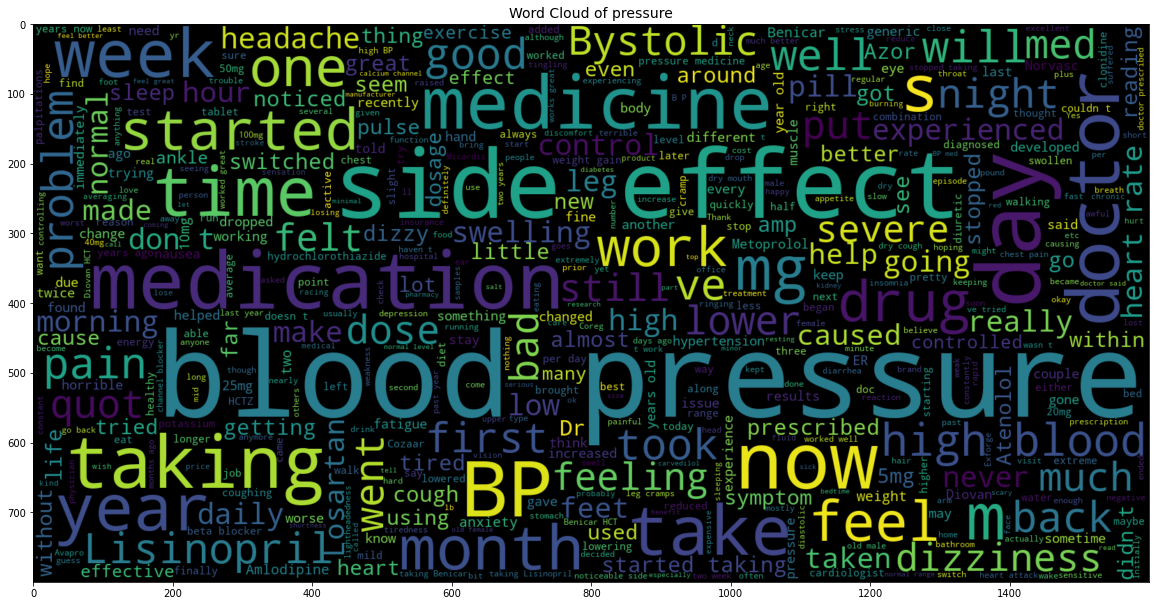

In [ ]:
plt.figure(figsize=(20,20))
word_cloud = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(x_pressure.review))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.title('Word Cloud of pressure', fontsize=14)

# **Data Preprocessing**


*   **Remove stop words and punctuations**
*   **Remove handles and URLs**
*   **Lowercasing** 
*   **stemming or lemitization** 


In [ ]:
x.head()

condition                                             review
0      Depression  "I&#039;ve tried a few antidepressants over th...
4   Birth Control  "I have been on this birth control for one cyc...
6   Birth Control  "I&#039;ve had the copper coil for about 3 mon...
9   Birth Control  "I was on this pill for almost two years. It d...
30  Birth Control  "I absolutely love this product and recommend ...

In [ ]:
# first let's explore one review :
x['review']

0        "I&#039;ve tried a few antidepressants over th...
4        "I have been on this birth control for one cyc...
6        "I&#039;ve had the copper coil for about 3 mon...
9        "I was on this pill for almost two years. It d...
30       "I absolutely love this product and recommend ...
35       "Have been on Actos for almost a year, gained ...
37       "I was on this for 5 years (and birth control ...
38       "I am a 22 year old female college student. I ...
43       "I&#039;m absolutely DONE taking this horrible...
45       "I started on the oral contraceptive pill but ...
46       "About two months ago I had to switch from LoL...
50       "I&#039;ve had this birth control for a year n...
53       "So I first got the nexplanon in July of 2014,...
54       "I started off by taking regular Ortho Tri Cyc...
61       "honestly the measurement hurt more than the a...
67       "Zoloft did not help me at all.  I was on it f...
70       "I was started on Gildess 1/20 but then was sw.

In [ ]:
x.review[6]

'"I&#039;ve had the copper coil for about 3 months now. I was really excited at the thought of not taking hormones. I&#039;m good with pain however I nearly fainted with insertion, couldn&#039;t belive how painful it was; the doctor did say it is very painful for some. Well 3 months in, my periods last 11 days and I&#039;m in pain for about 15 days with random twangs especially in the left side and I&#039;m considering whether I want to put up with the intense pain and heavy periods. I&#039;d recommend this 100% to somebody who doesn&#039;t already have heavy painful periods but right now it just isn&#039;t for me"'

In [ ]:
# First we gonna replace "" with space
for i, col in enumerate(x.columns): 
  x.iloc[:, i] = x.iloc[:, i].str.replace('"', '')

# U can apply the previous for loop as following
# x.iloc[:,1] = x.iloc[:,1].str.replace('"', '')
# Without the need of for loop i just made to make sure that every column doesn't contain ""

In [ ]:
x.head()

condition                                             review
0      Depression  I&#039;ve tried a few antidepressants over the...
4   Birth Control  I have been on this birth control for one cycl...
6   Birth Control  I&#039;ve had the copper coil for about 3 mont...
9   Birth Control  I was on this pill for almost two years. It do...
30  Birth Control  I absolutely love this product and recommend t...

**Stop words**

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**Stemming / Lemmatization**
* the following pic introduce the diffrence between them

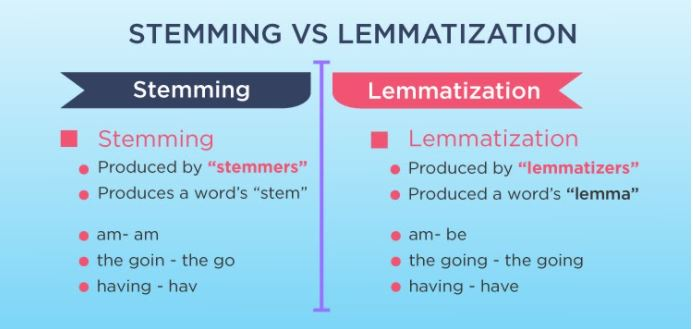

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from bs4 import BeautifulSoup
import re

In [ ]:
def process_review(review):

  # Removing stock market tikkers like $
  review = re.sub(r'\$\w*', '', review)
  # Removing hyperlinks
  review = re.sub(r'https?://[^\s\n\r]+', '', review)
  # Removing hashtags #
  review = re.sub(r'#', '', review)

  letters_only = re.sub('[^a-zA-Z]', ' ', review) 
  words = letters_only.lower().split()

  words = [w for w in words if not w in stop]
  lemmitize_words = [lemmatizer.lemmatize(w) for w in words]
  return( ' '.join(lemmitize_words))

In [ ]:
x['review_clean'] = x['review'].apply(process_review)

In [ ]:
x.head()

condition                                             review  \
0      Depression  I&#039;ve tried a few antidepressants over the...   
4   Birth Control  I have been on this birth control for one cycl...   
6   Birth Control  I&#039;ve had the copper coil for about 3 mont...   
9   Birth Control  I was on this pill for almost two years. It do...   
30  Birth Control  I absolutely love this product and recommend t...   

                                         review_clean  
0   tried antidepressant year citalopram fluoxetin...  
4   birth control one cycle reading review type si...  
6   copper coil month really excited thought takin...  
9   pill almost two year work far getting pregnant...  
30  absolutely love product recommend everyone kno...

**Splitting data into train and test**

In [ ]:
x_feat = x.review
y = x.condition

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_feat, y, stratify=y, test_size=0.2, random_state=0)

In [ ]:
y_train.shape

(11467,)

**Confussion matrix**

In [ ]:
# this function is from the official website
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

****
# **Vectorization**

1.   BOW (bag of words)   

2.   FT-IDF (foureir term inverse document foureir)



**1- BOW (bag of words)**

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(x_train)
count_test = count_vectorizer.transform(x_test) 

In [ ]:
count_train

<11467x13138 sparse matrix of type '<class 'numpy.int64'>'
	with 411478 stored elements in Compressed Sparse Row format>

In [ ]:
count_train.shape

(11467, 13138)

****
# **Machine learning models**

1.   naive bayes
2.   passive agressive classifier



**1- Naive bayes**

accuracy:   0.971
Confusion matrix, without normalization


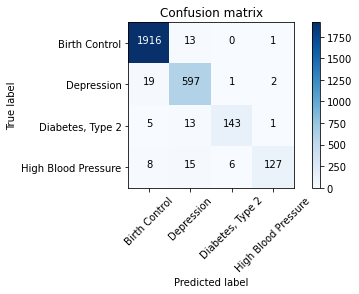

In [ ]:
multi_nb = MultinomialNB()
multi_nb.fit(count_train, y_train)
pred = multi_nb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

**2- Passive agressive classifier**

accuracy:   0.957
Confusion matrix, without normalization


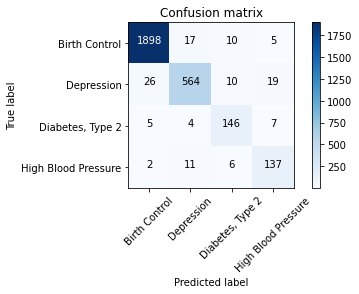

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

**2- TF-IDF**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

**1- Naive bayes**

accuracy:   0.869
Confusion matrix, without normalization


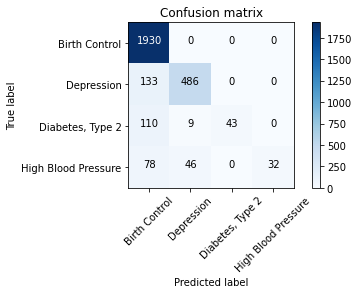

In [ ]:
multi_nb = MultinomialNB()
multi_nb.fit(tfidf_train, y_train)
pred = multi_nb.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

**2- Passive classifier**

accuracy:   0.970
Confusion matrix, without normalization


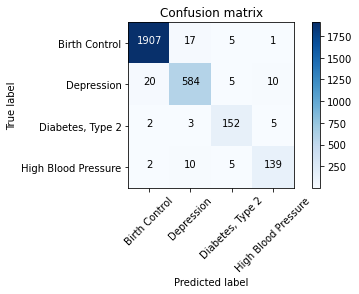

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

**TF-IDF bigrams**

accuracy:   0.970
Confusion matrix, without normalization


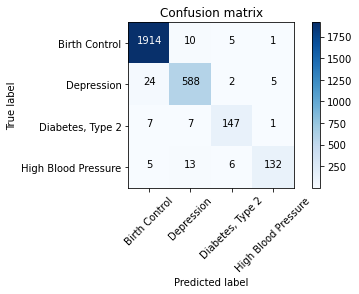

In [ ]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(x_train)
tfidf_test_2 = tfidf_vectorizer2.transform(x_test)
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

**TF-IDF trigrams**

accuracy:   0.970
Confusion matrix, without normalization


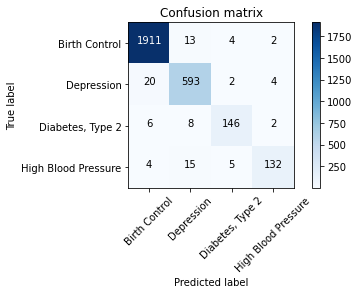

In [ ]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(x_train)
tfidf_test_3 = tfidf_vectorizer3.transform(x_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

# **Most important features**

In [ ]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)

most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Birth Control')

Birth Control eye 0.4880419935548832
Birth Control fathers 0.5022123696687731
Birth Control rubber 0.5136101845409466
Birth Control bowl 0.5769170496573317
Birth Control stent 0.6072164762169284
Birth Control unnoticeable 0.6086080970637806
Birth Control reproductive 0.7460030849150312
Birth Control dressed 0.8962099356044426
Birth Control seesawing 1.0586925103097415
Birth Control 125pds 2.102635983919306


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Depression')

Depression certaintly 0.42357413228029145
Depression dryer 0.4279045133929597
Depression concert 0.4313109489501822
Depression pulse 0.44894532975459917
Depression thinking 0.4642681808358894
Depression reasons 0.5043919687761188
Depression constipated 0.5450884729312587
Depression transferred 0.5875567769281904
Depression fillers 0.6088092814593588
Depression fend 0.9529672621989471


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'High Blood Pressure')

High Blood Pressure volume 0.2603243419051506
High Blood Pressure outrages 0.27808315883641116
High Blood Pressure fuller 0.27814298306874263
High Blood Pressure treated 0.2903368299395005
High Blood Pressure overreact 0.2959237409102169
High Blood Pressure fulfilling 0.33191971493054373
High Blood Pressure convienet 0.3587165750932637
High Blood Pressure shallow 0.4054634306834383
High Blood Pressure shape 0.4753220049300929
High Blood Pressure harm 1.7473666135224863


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2 personality 0.33419693974922526
Diabetes, Type 2 buffet 0.3354669057052394
Diabetes, Type 2 otcl 0.33688074193898343
Diabetes, Type 2 otc 0.33960446147986534
Diabetes, Type 2 iodine 0.38201085846391813
Diabetes, Type 2 xd 0.46843441549972276
Diabetes, Type 2 ipbroprohen 0.4751443244334893
Diabetes, Type 2 waterproof 0.48750009238707565
Diabetes, Type 2 10min 0.5029281187241461
Diabetes, Type 2 meats 0.5614831470066971


# **Predictions**
NOTE : the predictions is all based on onegram IF-IDF Passive Agressive Classifier so run it before prediction

In [ ]:
x.tail()

condition                                             review  \
53732     Depression  I&#039;m a 19 year old girl and I&#039;ve been...   
53741  Birth Control  I first would like to thank all of you that po...   
53759  Birth Control  I was on Microgestin for about 3 years. Over t...   
53760  Birth Control  I started taking Apri about 7 months ago. My b...   
53763  Birth Control  I&#039;m married, 34 years old and I have no k...   

                                            review_clean  
53732  year old girl suffering major depression socia...  
53741  first would like thank posted comment reading ...  
53759  microgestin year past year started get extreme...  
53760  started taking apri month ago breats got notic...  
53763  married year old kid taking pill hassle decide...

In [ ]:
text =["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."]
test = tfidf_vectorizer.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

'High Blood Pressure'

In [ ]:
text =["This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap."]
test = tfidf_vectorizer.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

'Depression'

In [ ]:
text =["I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me"]
test = tfidf_vectorizer.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

'Diabetes, Type 2'